In [1]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
kanto = pd.read_csv('./kanto.csv')
kansai = pd.read_csv('./kansai.csv')
n_cluster = 4

In [3]:
kanto_target = kanto[kanto['cluster_number'] == 2]

In [4]:
len(kanto_target)

596

In [5]:
# k-means法を使うためのインポート
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# データの列の絞り込み
pc = kanto_target[['pc1','pc2']]

# 標準化
sc = StandardScaler()
sc.fit(pc)
pc_std = sc.transform(pc)

0    116
1    110
2    119
3    251
Name: second_cluster_number, dtype: int64


Text(0, 0.5, 'count')

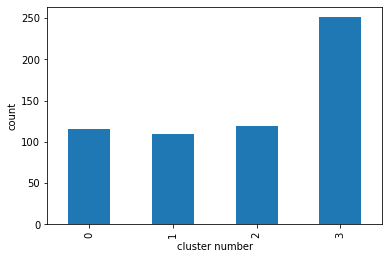

In [6]:
# KMeansクラスの初期化
kmeans = KMeans(init='random', n_clusters=n_cluster, random_state=0)

# クラスターの重心を計算
kmeans.fit(pc_std)

# クラスター番号をpandasのSeriesオブジェクトに変換
labels = pd.Series(kmeans.labels_, name='second_cluster_number', index=kanto_target.index)

# クラスター番号と件数を表示
print(labels.value_counts(sort=False))

# グラフを描画
ax = labels.value_counts(sort=False).plot(kind='bar')
ax.set_xlabel('cluster number')
ax.set_ylabel('count')

In [7]:
# 駅のデータにクラスター番号のデータを結合
kanto_target_with_cluster = pd.concat([kanto_target, pd.Series(labels, index=kanto_target.index)], axis=1)

# 先頭の5行を表示
kanto_target_with_cluster.head()

,station_cd,station_g_cd,station_name,station_name_k,station_name_r,line_cd,pref_cd,post,address,lon,...,street_density_km,circuity_avg,self_loop_proportion,clean_intersection_count,clean_intersection_density_km,cluster_number,pc1,pc2,station_name_roman,second_cluster_number
3,1130509,1130509,西浦和,NaN,NaN,11305,11,338-0837,さいたま市桜区田島５丁目,139.627707,...,21726.569992,1.042005,0.000000,301.0,125.451145,2,0.468508,-1.378730,nishiurawa,3
4,1130510,1130510,武蔵浦和,NaN,NaN,11305,11,336-0021,さいたま市南区別所七丁目12-1,139.647974,...,23983.223340,1.010927,0.000000,418.0,166.874979,2,0.902938,-0.362098,musashiurawa,1
5,1130511,1130511,南浦和,NaN,NaN,11305,11,336-0017,さいたま市南区南浦和２丁目,139.669125,...,26763.337448,1.015478,0.000458,510.0,203.253653,2,2.047157,0.335212,minamiurawa,1
15,1131708,1131708,東飯能,NaN,NaN,11317,11,357-0034,飯能市東町１丁目,139.325965,...,25213.526796,1.028333,0.000465,468.0,190.671774,2,2.041164,-0.306881,higashihannou,1
16,1131709,1131709,高麗川,NaN,NaN,11317,11,350-1205,日高市原宿,139.338090,...,22043.075041,1.057730,0.001035,358.0,147.900834,2,1.358268,-1.202204,kouraigawa,3


In [8]:
import folium
center_lat, center_lon = (35.6812, 139.7671) # 東京の緯度経度
#center_lat, center_lon = (34.6413, 135.5629) # 大阪の緯度経度

_map = folium.Map(location=[center_lat, center_lon], zoom_start=12)

for _, station in kanto_target_with_cluster.iterrows():
    color = 'red' if station['second_cluster_number'] == 0 else 'pink' if station['second_cluster_number'] == 1 else 'blue' if station['second_cluster_number'] == 2 else 'green' if station['second_cluster_number'] == 3 else 'orange' if station['second_cluster_number'] == 4 else 'violet' if station['second_cluster_number'] == 5 else 'yellow' if station['second_cluster_number'] == 6 else 'gray' if station['second_cluster_number'] == 7 else 'black'
    folium.Marker([station.lat, station.lon], popup=str(station['station_name_roman']), icon=folium.Icon(color=color)).add_to(_map)

_map

In [9]:
kansai_target = kansai[kansai['cluster_number'] == 2]

In [10]:
# データの列の絞り込み
pc = kansai_target[['pc1','pc2']]

# 標準化
sc = StandardScaler()
sc.fit(pc)
pc_std = sc.transform(pc)

0    165
1    139
2     94
3    133
Name: second_cluster_number, dtype: int64


Text(0, 0.5, 'count')

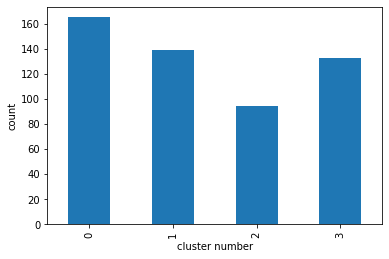

In [11]:
# KMeansクラスの初期化
kmeans = KMeans(init='random', n_clusters=n_cluster, random_state=0)

# クラスターの重心を計算
kmeans.fit(pc_std)

# クラスター番号をpandasのSeriesオブジェクトに変換
labels = pd.Series(kmeans.labels_, name='second_cluster_number', index=kansai_target.index)

# クラスター番号と件数を表示
print(labels.value_counts(sort=False))

# グラフを描画
ax = labels.value_counts(sort=False).plot(kind='bar')
ax.set_xlabel('cluster number')
ax.set_ylabel('count')

In [12]:
# 駅のデータにクラスター番号のデータを結合
kansai_target_with_cluster = pd.concat([kansai_target, pd.Series(labels, index=kansai_target.index)], axis=1)

# 先頭の5行を表示
kansai_target_with_cluster.head()

,station_cd,station_g_cd,station_name,station_name_k,station_name_r,line_cd,pref_cd,post,address,lon,...,node_density_km,intersection_density_km,edge_density_km,street_density_km,clean_intersection_density_km,cluster_number,Unnamed: 0,pc1,pc2,second_cluster_number
45,1160115,1160115,瀬田,NaN,NaN,11601,25,520-2144,大津市大萱１丁目,135.925673,...,240.238796,182.443466,40589.278348,20524.252040,127.667295,2.0,45.0,-0.048213,1.790080,1
47,1160117,1160117,膳所,NaN,NaN,11601,25,520-0802,大津市馬場２丁目,135.880539,...,281.727977,210.472217,41005.124409,21337.175364,130.155030,2.0,47.0,-0.388055,2.561945,0
49,1160119,1160119,山科,NaN,NaN,11601,26,607-8009,京都市山科区安朱北屋敷町,135.816647,...,311.554023,266.846720,40803.883490,20571.457171,148.092944,2.0,49.0,-1.169640,1.830884,1
50,1160120,1160120,京都,NaN,NaN,11601,26,600-8216,京都市下京区烏丸通塩小路下ル東塩小路町,135.757748,...,301.669977,280.380351,40620.660135,26134.978800,149.830761,2.0,50.0,-2.133377,2.660421,0
51,1160201,1160120,京都,NaN,NaN,11602,26,600-8216,京都市下京区烏丸通塩小路下ル東塩小路町,135.757748,...,301.669977,280.380351,40620.660135,26134.978800,149.830761,2.0,51.0,-2.133377,2.660421,0


In [13]:
for _, station in kansai_target_with_cluster.iterrows():
    color = 'red' if station['second_cluster_number'] == 0 else 'pink' if station['second_cluster_number'] == 1 else 'blue' if station['second_cluster_number'] == 2 else 'green' if station['second_cluster_number'] == 3 else 'orange' if station['second_cluster_number'] == 4 else 'violet' if station['second_cluster_number'] == 5 else 'yellow' if station['second_cluster_number'] == 6 else 'gray' if station['second_cluster_number'] == 7 else 'black'
    folium.Marker([station.lat, station.lon], popup=str(station['station_name_roman']), icon=folium.Icon(color=color)).add_to(_map)

_map

In [14]:
_map.save(f'residential1_stations_by_{n_cluster}.html') # 保存